# Airfare Price Predcition 

Dataset:   airq402.dat

Source: U.S. Department of Transportation

Description: Airfares and passengers for U.S. Domestic Routes
for 4th Quarter of 2002.

Variables/Columns

City1   1-3
City2   5-7
Average Fare    11-17
Distance      20-23
Average weekly passengers   26-33
market leading airline    36-37
market share     40-45
Average fare    48-54
Low price airline   57-58
market share    61-66
price     69-7

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Loading dataset and gicing column names
df = pd.read_table('Airfares.txt', delim_whitespace=True,header=None,names=('City_1','City_2','Average_Fare','Distance','Average_weekly_passengers','market_leading_airline','market_share','Average_fare','Low_price_airline','market_share_low','price'))
df.head()

,City_1,City_2,Average_Fare,Distance,Average_weekly_passengers,market_leading_airline,market_share,Average_fare,Low_price_airline,market_share_low,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [8]:
#Checking datatypes of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
City_1                       1000 non-null object
City_2                       1000 non-null object
Average_Fare                 1000 non-null float64
Distance                     1000 non-null int64
Average_weekly_passengers    1000 non-null float64
market_leading_airline       1000 non-null object
market_share                 1000 non-null float64
Average_fare                 1000 non-null float64
Low_price_airline            1000 non-null object
market_share_low             1000 non-null float64
price                        1000 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.1+ KB


In [9]:
#Checking shape of dataset(row,column)
df.shape

(1000, 11)

In [10]:
#Checking summary statistics
df.describe()

,Average_Fare,Distance,Average_weekly_passengers,market_share,Average_fare,market_share_low,price
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,163.37542,1056.973000,672.279140,60.128590,166.64756,34.551480,143.193090
std,55.36547,643.203251,766.519254,19.367779,62.66014,27.096999,47.229184
min,50.52000,108.000000,181.410000,17.680000,50.52000,1.060000,49.610000
25%,125.97500,553.500000,257.197500,46.510000,124.08500,13.195000,113.767500
50%,161.34500,919.000000,404.780000,59.240000,161.40000,26.140000,137.825000
75%,197.39250,1452.500000,769.912500,73.510000,202.97750,52.972500,168.530000
max,401.23000,2724.000000,8950.760000,100.000000,490.03000,100.000000,387.940000


## Check for Missing Values

In [11]:
df.isna().sum()

City_1                       0
City_2                       0
Average_Fare                 0
Distance                     0
Average_weekly_passengers    0
market_leading_airline       0
market_share                 0
Average_fare                 0
Low_price_airline            0
market_share_low             0
price                        0
dtype: int64

- No missing values

## Exploratory Data Analysis

## a.Univariate Analysis

### 1.Average_Fare(Target Variable)

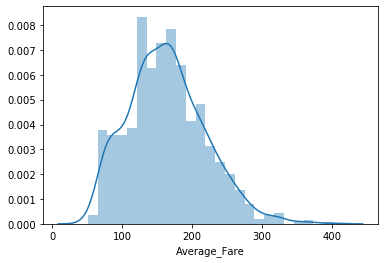

In [55]:
#Average fair for a week

sns.distplot(df['Average_Fare'])

- Average Fair is between 100$ to 220$ and max is 320$

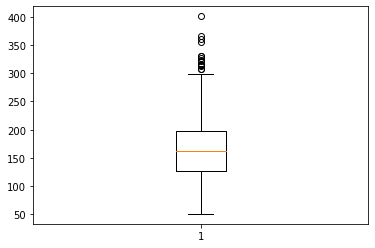

In [46]:
box = plt.boxplot(df['Average_Fare']);

In [47]:
#list comprehension to get exact values of caps
[item.get_ydata()[0] for item in box['caps']]

[50.52, 299.31]

In [48]:
#list comprehension to get exact values of whiskers
[item.get_ydata()[0] for item in box['whiskers']]

[125.975, 197.39249999999998]

In [50]:
#list comprehension to get exact values of median
[item.get_ydata()[0] for item in box['medians']]

[161.34500000000003]

- After 299.31 there are outliers values
- Quartile are in range btw 125.975, 197.392
- Median value is btw 161

In [57]:
# Cities with Average Fare above Maximum (Q3+1.5IQR)

df.loc[df['Average_Fare'] > 299.31,['City_1','City_2']]

,City_1,City_2
197,BOS,LAX
212,BOS,SAN
213,BOS,SFO
328,CVG,LAX
607,IAH,SFO
709,LAX,MIA
714,LAX,LGA
737,LAX,IAD
760,MIA,SFO
836,LGA,SAN


- These are the Anomalies

### 2.Distance

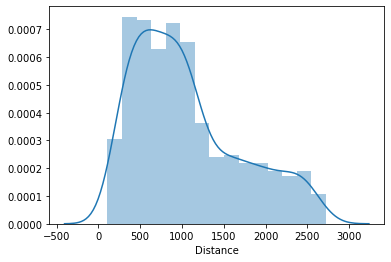

In [17]:
sns.distplot(df['Distance'])

- Most of the distance lies between 500 to 1000 

### 3.Average_weekly_passengers

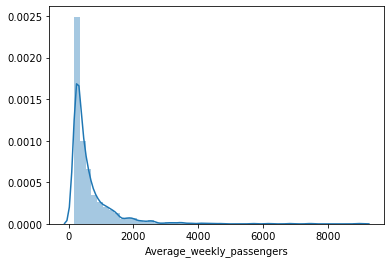

In [19]:
sns.distplot(df['Average_weekly_passengers'])

- It starts from around 10 passengers and spikes up at around 100-200 passengers and maximum it goes to 2000 depending on specfic route

### 4.market_leading_airline

WN    257
DL    162
AA    135
UA     91
NW     86
CO     69
US     68
AS     32
HP     30
FL     16
YX     16
B6     14
NK     10
TZ     10
F9      3
G4      1
Name: market_leading_airline, dtype: int64


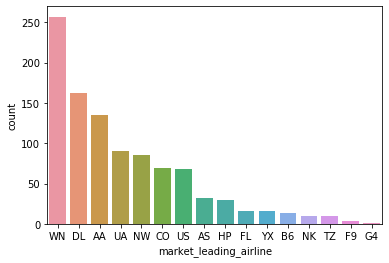

In [38]:
print(df['market_leading_airline'].value_counts())
sns.countplot(df['market_leading_airline'],order = df['market_leading_airline'].value_counts().index);

- The top three Airlines are WN,DL and AA

### 5.market_share

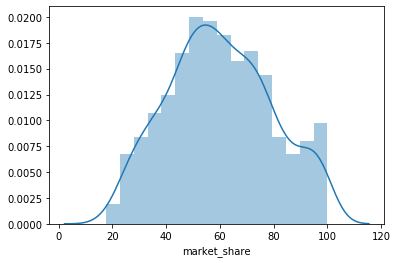

In [53]:
sns.distplot(df['market_share'])

### 6.City_1

In [41]:
#Top 5 cities in City_1
df['City_1'].value_counts()[0:5]

ATL    64
ORD    63
DFW    52
BWI    47
BOS    38
Name: City_1, dtype: int64

- Top 5 cities contributing in Average weekly price are ATL,ORD,DFW,BWI,BOS

### 7.City_2

In [42]:
#Top 5 cities in City_2
df['City_2'].value_counts()[0:5]

TPA    46
MCO    43
SEA    42
LGA    42
IAD    40
Name: City_2, dtype: int64

- Top 5 cities contributing in Average weekly price are TPA,MCO,SEA,LGA,IAD

### 8.Low_price_airline

WN    230
DL    151
AA    129
US    101
FL     60
HP     58
UA     55
CO     45
TZ     34
NW     33
F9     30
AS     27
NK     16
B6     15
SY      7
YX      3
AX      3
AQ      2
G4      1
Name: Low_price_airline, dtype: int64


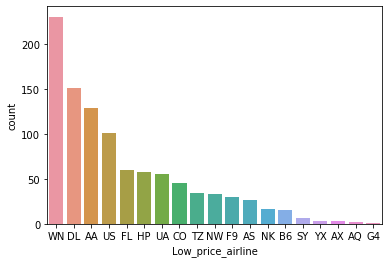

In [59]:
print(df['Low_price_airline'].value_counts())
sns.countplot(df['Low_price_airline'],order = df['Low_price_airline'].value_counts().index);

- Top low price carriers are WN,DL,AA,US,FL

## b.Bivariate Analysis

In [61]:
df.head()

,City_1,City_2,Average_Fare,Distance,Average_weekly_passengers,market_leading_airline,market_share,Average_fare,Low_price_airline,market_share_low,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


### 1.Average_Fare and Distance

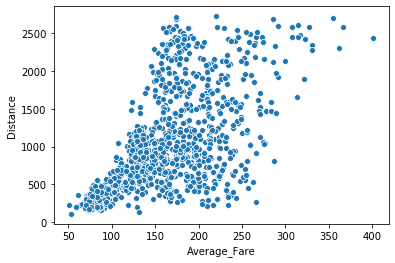

In [63]:
sns.scatterplot(df['Average_Fare'],df['Distance'])

- We can see that as Distance is increasing,Average fare is increasing
- Majority of fare is capped at 250$

## Correlation Matrix & Pairplot

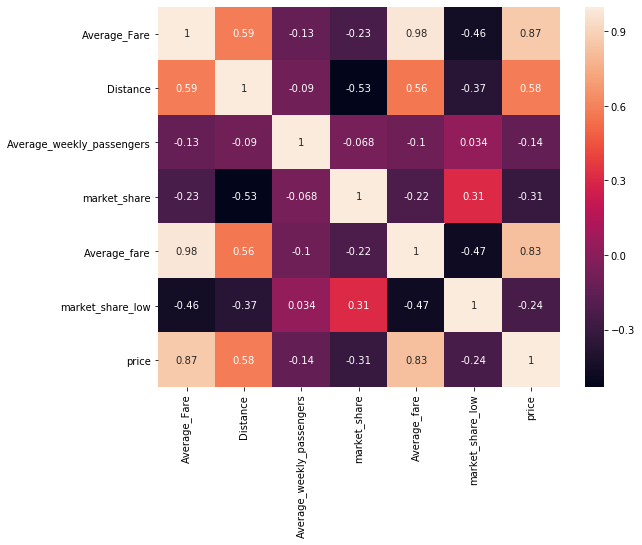

In [70]:
plt.figure(figsize = (9,7))
sns.heatmap(df.corr(),annot = True)

- Distance and Average_Fare has a good correlation
- Average fare of low cost carrier has a very high correlation 
- Average weekly passenger and market share has a low negative correlation

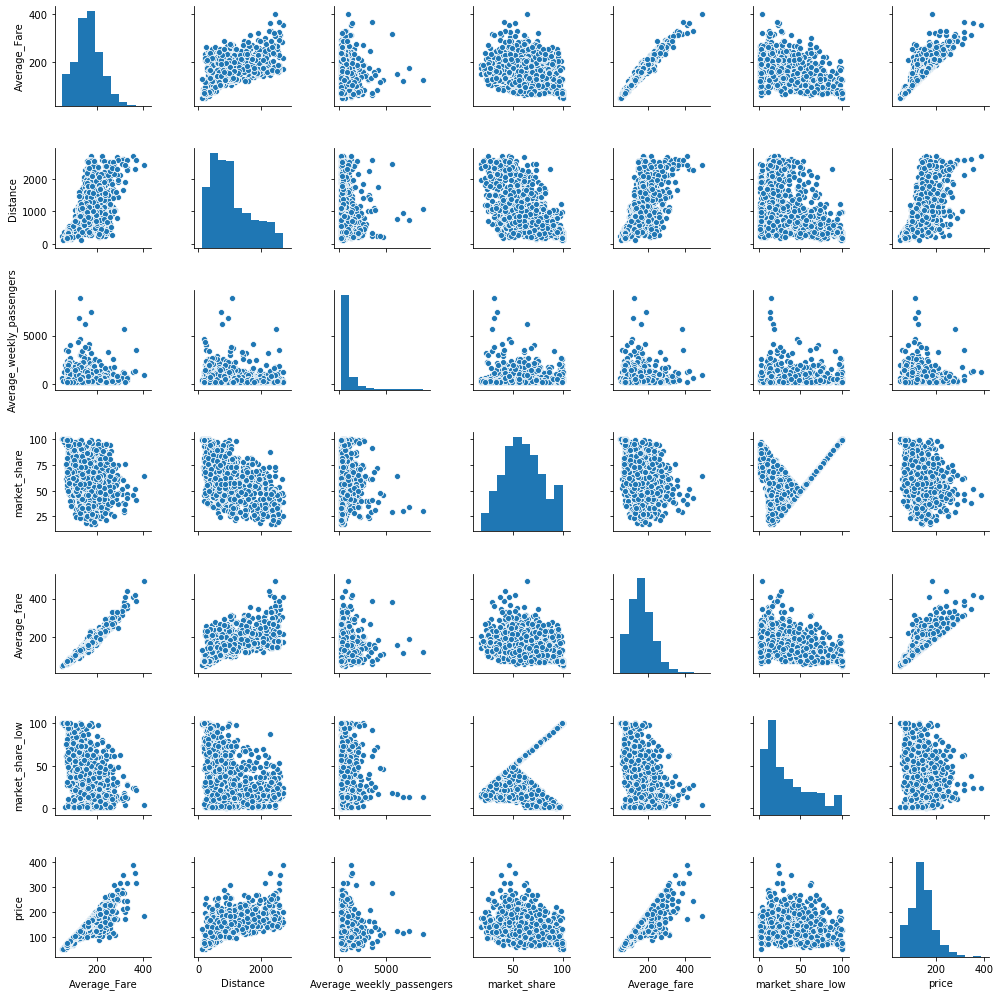

In [72]:
sns.pairplot(df,height = 2)

## Handling Categorical Data

In [73]:
df_categorical = df[['City_1','City_2','market_leading_airline','Low_price_airline']]

In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
le = LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,City_1,City_2,market_leading_airline,Low_price_airline
0,16,0,6,8
1,16,40,6,6
2,2,0,4,5
3,2,7,14,17
4,2,52,12,17


In [76]:
# concat df_categorical with original df
df = df.drop(df_categorical.columns, axis=1)
df = pd.concat([df, df_categorical], axis=1)
df.head()

,Average_Fare,Distance,Average_weekly_passengers,market_share,Average_fare,market_share_low,price,City_1,City_2,market_leading_airline,Low_price_airline
0,114.47,528,424.56,70.19,111.03,70.19,111.03,16,0,6,8
1,122.47,860,276.84,75.10,123.09,17.23,118.94,16,40,6,6
2,214.42,852,215.76,78.89,223.98,2.77,167.12,2,0,4,5
3,69.40,288,606.84,96.97,68.86,96.97,68.86,2,7,14,17
4,158.13,723,313.04,39.79,161.36,15.34,145.42,2,52,12,17


## Declaring X and y 

In [83]:
y = df['Average_Fare']
X = df.drop('Average_Fare',axis = 1)

In [84]:
#Splitting into 70:30 ratio
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [87]:
import statsmodels.api as sm

Xc = sm.add_constant(X)

model = sm.OLS(y,X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Average_Fare   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          3.697e+04
Date:                Sun, 26 Jul 2020   Prob (F-statistic):                        0.00
Time:                        00:02:17   Log-Likelihood:                         -3606.6
No. Observations:                1000   AIC:                                      7233.
Df Residuals:                     990   BIC:                                      7282.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Distance                      0.0036      0.001      5.829      0.000       0.002       0.005
Average_weekly_passengers    -0.0004      0.000     -1.184      0.237      -0.001       0.000
market_share                  0.1431      0.015      9.846      0.000       0.115       0.172
Average_fare                  0.7027      0.010     71.248      0.000       0.683       0.722
market_share_low             -0.0596      0.014     -4.406      0.000      -0.086      -0.033
price                         0.2415      0.012     20.221      0.000       0.218       0.265
City_1                        0.0280      0.013      2.203      0.028       0.003       0.053
City_2                       -0.0020      0.013     -0.149      0.881      -0.028       0.024
market_leading_airline       -0.2146      0.056     -3.866      0.000      -0.324      -0.106
Low_price_airline             0.2174      0.050      4.376      0.000       0.120       0.315
==============================================================================
Omnibus:                      131.302   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              733.990
Skew:                           0.449   Prob(JB):                    4.13e-160
Kurtosis:                       7.100   Cond. No.                         305.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Assumptions-1 No Multicolinearity among Independent variables

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [91]:
pd.DataFrame([vif(Xc.values, i) for i in range(Xc.shape[1])],index = Xc.columns,columns = ['VIF'])

,VIF
const,51.904075
Distance,2.136186
Average_weekly_passengers,1.060352
market_share,1.582556
Average_fare,4.761154
market_share_low,1.686059
price,4.294375
City_1,1.115654
City_2,1.143477
market_leading_airline,1.187927


- There is not much VIF

## Assumption 2: Residuals must be normally distributed with mean zero

<function matplotlib.pyplot.show(*args, **kw)>

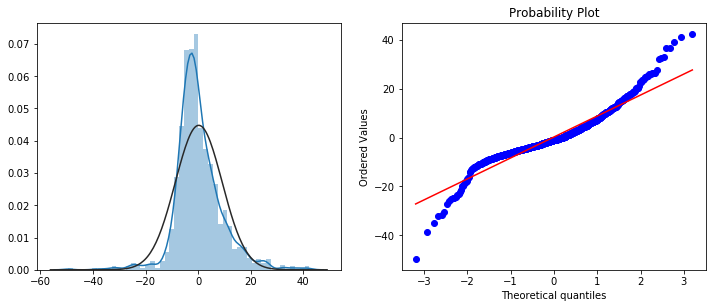

In [94]:
plt.figure(figsize = (12,10))

#Distribution of Residual
from scipy.stats import norm
plt.subplot(221)
norm.fit(model.resid)
sns.distplot(model.resid,fit = norm)

#Probplot for the Residual
plt.subplot(222)
from scipy import stats
stats.probplot(model.resid,plot = plt)
plt.show

In [95]:
#Statistical test of Normality

#Ho: Data is normal
#H1: Data is not normal


from scipy import stats
print(stats.jarque_bera(model.resid))

(733.9899854699537, 0.0)


- Since the probablity < 0.05, we failed to accept Ho and conclude that residuals are not normally distributed.

In [97]:
#We are transforming y using log and adding constant
y = np.log(df['Average_Fare'])
X = df.drop(['Average_Fare'],axis = 1)
Xc = sm.add_constant(X)

C:\Users\Avish\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [98]:
model = sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Average_Fare   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     1334.
Date:                Sun, 26 Jul 2020   Prob (F-statistic):               0.00
Time:                        00:18:53   Log-Likelihood:                 952.64
No. Observations:                1000   AIC:                            -1883.
Df Residuals:                     989   BIC:                            -1829.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         4.2682      0.021    199.621      0.000       4.226       4.310
Distance                   1.611e-05   6.75e-06      2.388      0.017    2.87e-06    2.94e-05
Average_weekly_passengers -2.237e-05   3.99e-06     -5.607      0.000   -3.02e-05   -1.45e-05
market_share                 -0.0003      0.000     -1.514      0.130      -0.001    8.66e-05
Average_fare                  0.0035      0.000     34.137      0.000       0.003       0.004
market_share_low             -0.0016      0.000    -11.314      0.000      -0.002      -0.001
price                         0.0020      0.000     15.713      0.000       0.002       0.002
City_1                     5.347e-05      0.000      0.397      0.692      -0.000       0.000
City_2                       -0.0004      0.000     -2.919      0.004      -0.001      -0.000
market_leading_airline       -0.0035      0.001     -5.857      0.000      -0.005      -0.002
Low_price_airline             0.0005      0.001      0.980      0.327      -0.001       0.002
==============================================================================
Omnibus:                      197.704   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              546.777
Skew:                          -1.006   Prob(JB):                    1.86e-119
Kurtosis:                       6.012   Cond. No.                     1.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<function matplotlib.pyplot.show(*args, **kw)>

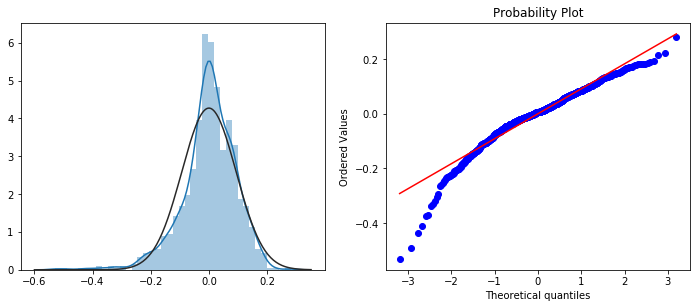

In [100]:
#Again plotting the graph to see the difference after applying log
plt.figure(figsize = (12,10))

#Distribution of Residual
from scipy.stats import norm
plt.subplot(221)
norm.fit(model.resid)
sns.distplot(model.resid,fit = norm)

#Probplot for the Residual
plt.subplot(222)
from scipy import stats
stats.probplot(model.resid,plot = plt)
plt.show

In [101]:
#Statistical test of Normality

from scipy import stats
print(stats.jarque_bera(model.resid))

(546.7774016736324, 0.0)


- We can see that since the probablity < 0.05, we failed to accept Ho and conclude that residuals are not normally distributed.

## Assumption 3:Residuals are homoscedastic(residuals gets same variance)

Text(0, 0.5, 'residuals')

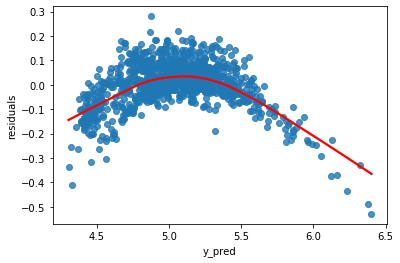

In [102]:
model = sm.OLS(y,Xc).fit()
y_pred = model.predict(Xc)
resids = model.resid

sns.regplot(x = y_pred, y = resids,lowess=True,line_kws={'color':'red'})
plt.xlabel('y_pred')
plt.ylabel('residuals')

In [ ]:
#H0 - The Data is HOMOSCEDASTIC (Uniform Variance)
#H1 - Data is HETEROSCEDASTIC( Unequal Variance)

#Ho: Variance of residuals is constant across the range of data.
#H1: Variance of residuals is not constant across the range of data.

In [103]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip


name = ['F-statistics','p-value']
test = sms.het_goldfeldquandt(model.resid,model.model.exog)
print(lzip(name,test))

[('F-statistics', 1.2215993441114175), ('p-value', 0.013547670902710782)]


- We can clearly infer that p_value<0.05 so we accept Alternate hypothesis and Data is Heteroscedastic

## Assumption 4 : There is no autocorrelation among the residuals.

C:\Users\Avish\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


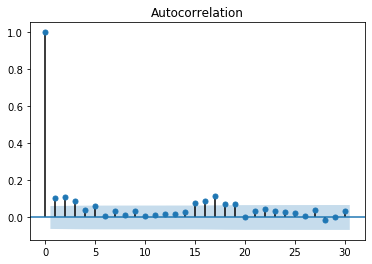

In [104]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(model.resid,lags = 30,alpha = 0.05)
acf.show()

- DW statistic for any model will be between 0 and 4. To conclude that there is auto-correlation DW-statistic should be around 2. The DW statistic for the model is 1.870 and this indicate moderate level of autocorrelation.

## Assumption 5: Linearity of Residuals

In [105]:
#Ho: residuals exhibit linearity
#H1: residuals exhibit non-linearity

import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res = model,frac=0.5)

(1.1694266146510768, 0.04114825635036679)

- We accept alternate hypothesis as p_value<0.05 and therefore residuals exhibhit non-linearity

# Building the Linear regression model

In [108]:
from sklearn.linear_model import LinearRegression

In [106]:
y = df['Average_Fare']
X = df.drop('Average_Fare',axis = 1)

In [107]:
#Creating train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=100)

In [109]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [110]:
y_pred = lr.predict(X_test)

In [112]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.976128982255663


In [113]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

6.1899576784290815
8.670301911636859


In [114]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print('r-squared on Train: ', r2_score(y_train,y_train_pred))
print('r-squared on Test: ', r2_score(y_test,y_test_pred))

r-squared on Train:  0.9745319766665045
r-squared on Test:  0.976128982255663
